In [3]:
import pandas as pd
import numpy as np
np.random.seed(42)
import os

# Para plots bonitinhos
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Exploração de dados

In [4]:
dataset = pd.read_csv("insurance.csv")

In [5]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
dataset.shape

(1338, 7)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Observa-se que todas as 1338 linhas estão preenchidas para todas as colunas, não tendo valores nulos no dataset.

Existem 3 variávies que não são numéricas, vamos analisar essas 3 variáveis: SEX, SMOKER e REGION.

In [8]:
print("Sex: ", set(dataset["sex"]))
print("Smoker: ", set(dataset["smoker"]))
print("Region: ", set(dataset["region"]))

Sex:  {'male', 'female'}
Smoker:  {'yes', 'no'}
Region:  {'northeast', 'southwest', 'northwest', 'southeast'}


In [9]:
dataset["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [10]:
dataset["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [11]:
dataset["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Analisar os dados do tipo numérico:

In [12]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

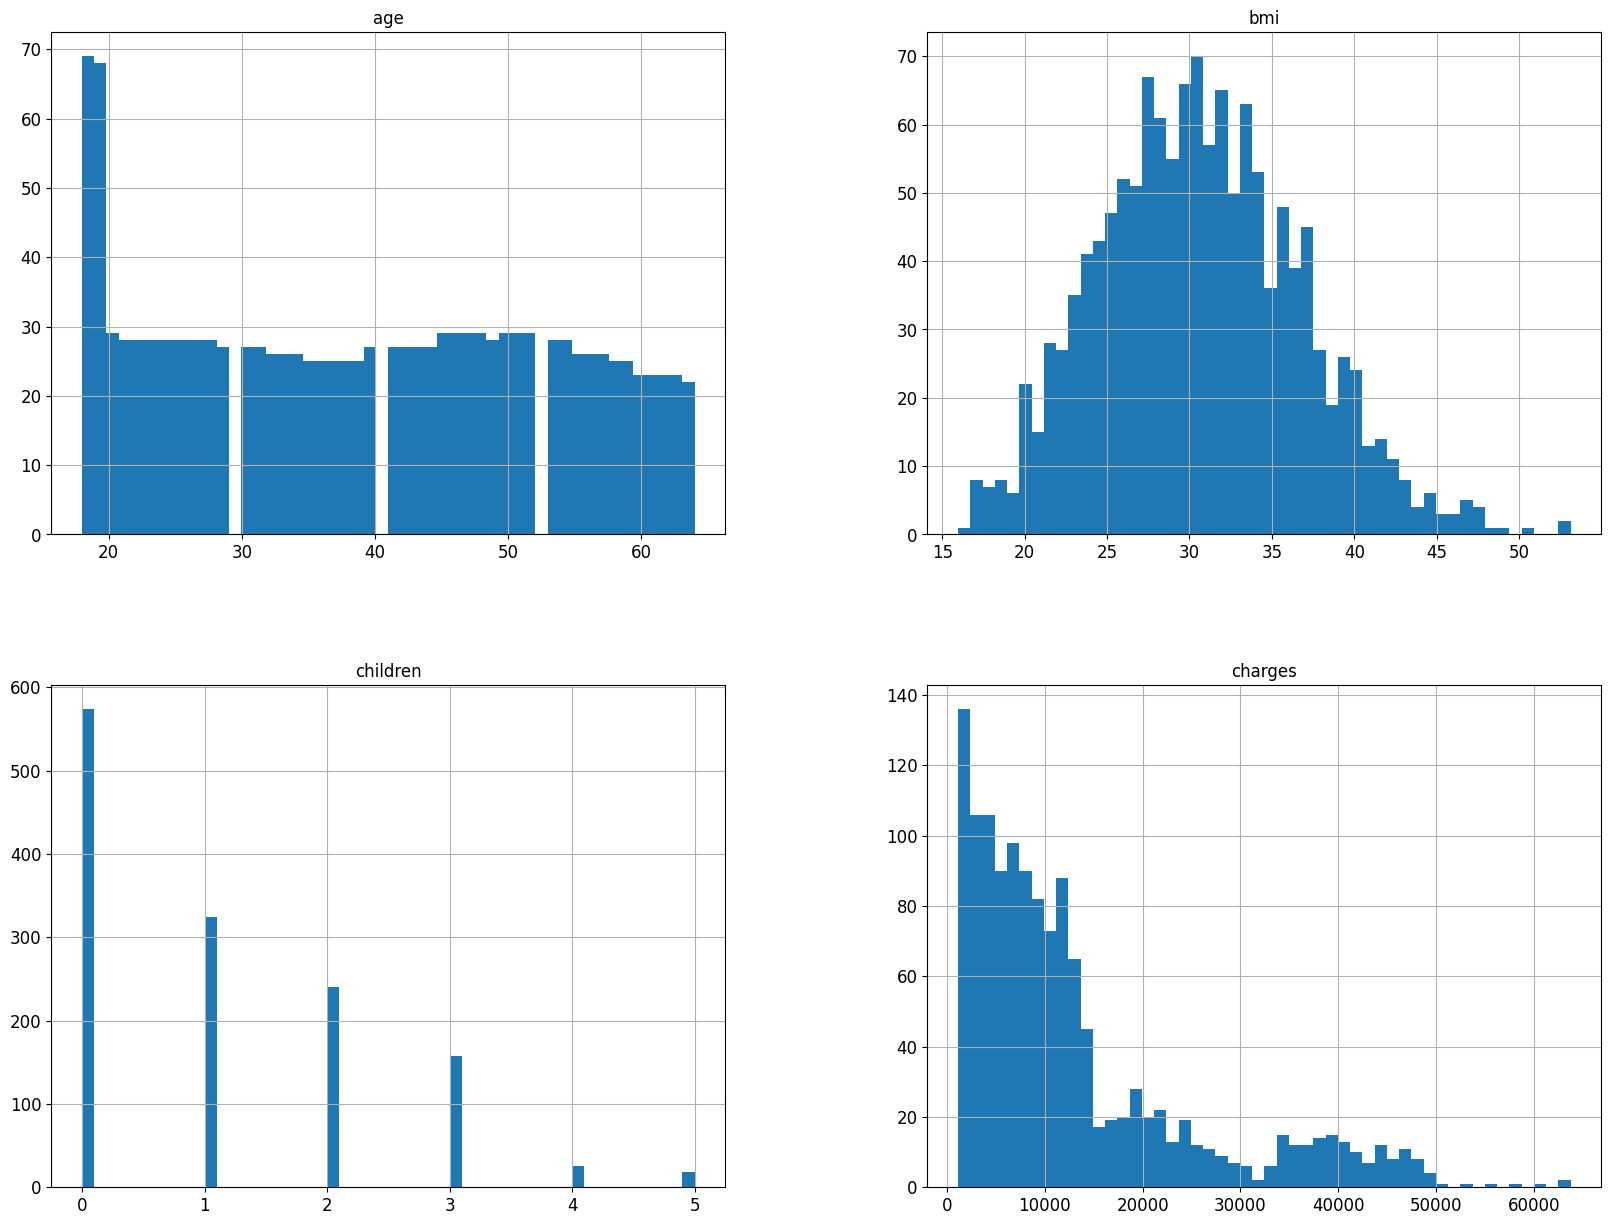

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20,15))

Observações:

- No gráfico de idade (age) percebe-se que é a distribuição é quase igual de 20 a 60 anos, tendo uma concentraçaõ em 18 e 19 anos.
- No histograma de imc (bci) observa-se que está simétrico, tendo uma média em 30.
- A variável de crianças (children) tem uma concentração maior em 0, e os registros vão diminuindo quando a quantidade de crianças aumenta.
- A variável charges (despesas) é nossa target. Tem uma concentração grande de registros antes do 10.000 dólares, e seus dados vão até 64.000 dólares, mas com poucos registros depois dos 50.000.
- É possível observar bastante assimetria nos dados.

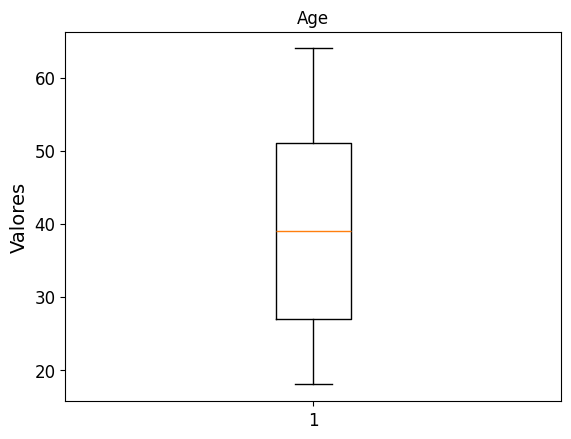

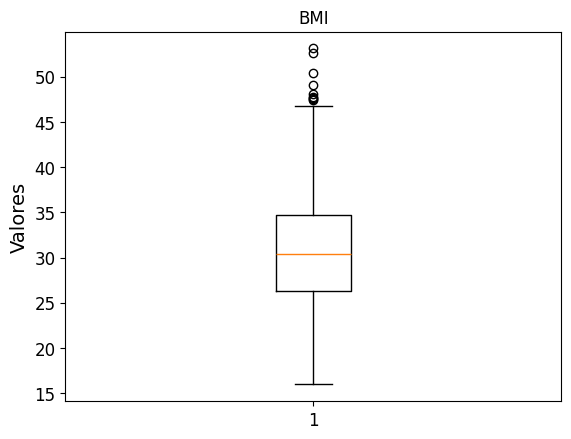

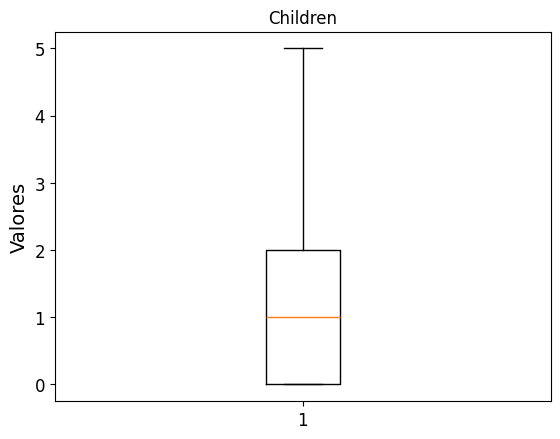

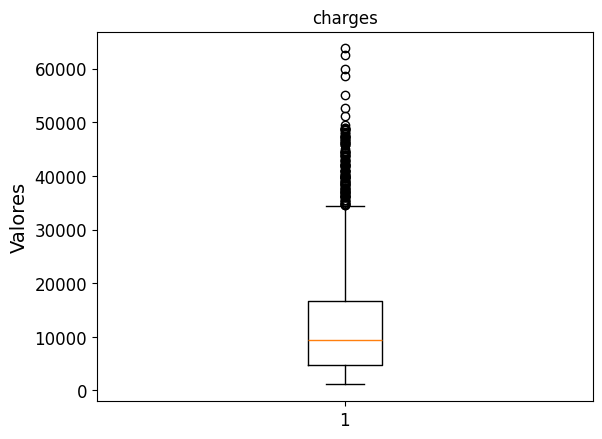

In [33]:
import matplotlib.pyplot as plt

# Criar o gráfico de boxplot
plt.boxplot(dataset['age'])
plt.title('Age')
plt.ylabel('Valores')
plt.show()

# Criar o gráfico de boxplot
plt.boxplot(dataset['bmi'])
plt.title('BMI')
plt.ylabel('Valores')
plt.show()

# Criar o gráfico de boxplot
plt.boxplot(dataset['children'])
plt.title('Children')
plt.ylabel('Valores')
plt.show()

# Criar o gráfico de boxplot
plt.boxplot(dataset['charges'])
plt.title('charges')
plt.ylabel('Valores')
plt.show()

#### Separando o dataset em variáveis categóricas e numéricas

In [14]:
categorical_columns = dataset.select_dtypes(include=object).columns.tolist()
numerical_columns = dataset.select_dtypes(exclude=object).columns.tolist()

In [21]:
correlation_matrix = dataset[numerical_columns].corr()
correlation_matrix

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


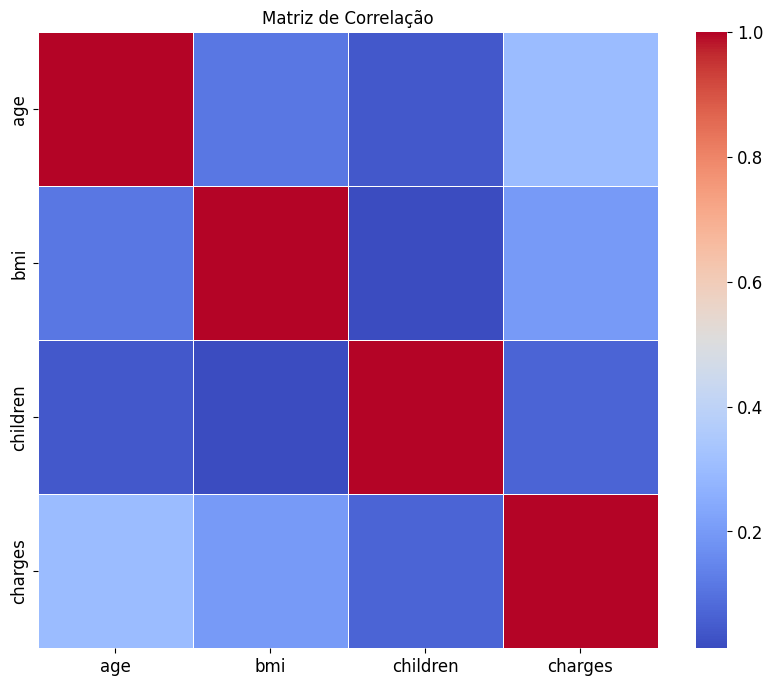

In [22]:
import seaborn as sns

# Visualização da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

Observa-se que nenhuma das variáveis numéricas tem muita correlação. Idade é uma das que tem um pouco mais, porém ainda menor do que 0.5.

## Pré-processamento de dados

Faremos a conversão das variáveis categóricas: sex, smoker e region para observarmos se elas tem alguma correlação com as outras variáveis e com a nossa target - charges.

In [16]:
categorical_columns

['sex', 'smoker', 'region']

In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Ajustar e transformar os rótulos
dataset['sex'] = label_encoder.fit_transform(dataset['sex'])
dataset['smoker'] = label_encoder.fit_transform(dataset['smoker'])
dataset['region'] = label_encoder.fit_transform(dataset['region'])

dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [25]:
dataset.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


Agora que as variáveis categóricas foram transformadas em numéricas, vamos avaliar o dataset novamente.

In [20]:
correlacao = dataset.corr()
correlacao

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


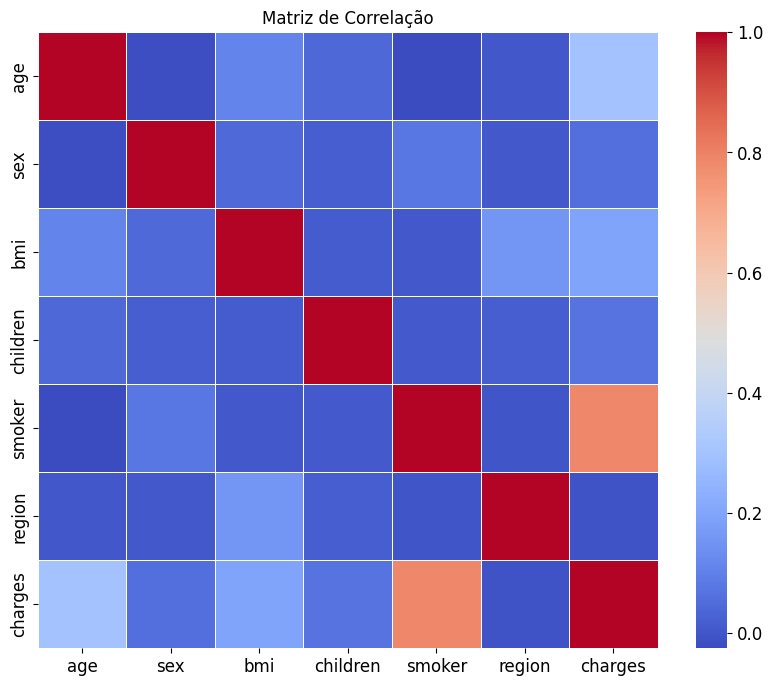

In [23]:
import seaborn as sns

# Visualização da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

- Observa-se que a variável smoker tem uma correlação com a nossa target.

Vamos normalizar os dados para ver se a correlação entre eles aumenta.

## Modelagem

In [22]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(dataset, test_size=0.2, random_state=7)

In [27]:
treino = len(df_train)
teste = len(df_test)
print(f"Treinamento: {treino} linhas")
print(f"Teste: {teste} linhas")

Treinamento: 1070 linhas
Teste: 268 linhas


## Treinamento e avaliação do modelo

## Validação estatística